In [2]:
import csv
from pathlib import Path

from cymruwhois import Client as cymruclient

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from time import strftime
import pandas as pd
import re
import time
import requests
from dateutil import rrule
from time import mktime
from requests.exceptions import RetryError
from random import randint

from pytx import ThreatDescriptor
from pytx.vocabulary import ThreatExchange as te
from pytx.access_token import access_token
from pytx.logger import setup_logger
from pytx.vocabulary import PrivacyType as pt

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/home/omar/anaconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# Load data from pre-made data.csv

with open('data.csv') as f:
    d = pd.read_csv(f, parse_dates=[],low_memory=False)
d

,Unnamed: 0,added_on,confidence,description,expired_on,first_active,id,indicator,last_active,last_updated,...,review_status,severity,share_level,source_uri,status,tags,type,ds,ts,name
0,0,2016-10-10T04:27:04+0000,50,Teaserinj Malicious Script Injection on Possib...,NaN,NaN,989335801175994,"{'id': '989335794509328', 'indicator': 'http:/...",NaN,2016-10-10T04:27:06+0000,...,UNREVIEWED,SEVERE,GREEN,NaN,MALICIOUS,NaN,URI,2016-10-10,2016-10-10 04:27:04,RiskIQ
1,0,2016-01-01T23:29:55+0000,90,Compromised domain in AS3741. Malicious URL:mo...,NaN,NaN,875325125915484,"{'id': '875325115915485', 'indicator': 'molgri...",NaN,2016-05-21T23:43:18+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:29:55,Cloudmark Threat Exchange
2,1,2016-01-01T23:24:49+0000,90,Compromised domain in AS32613. Malicious URL:p...,NaN,NaN,953897001325079,"{'id': '953896997991746', 'indicator': 'p13855...",NaN,2016-05-26T22:17:16+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:49,Cloudmark Threat Exchange
3,2,2016-01-01T23:24:48+0000,90,Compromised domain in AS32613. Malicious URL:h...,NaN,NaN,942876809114340,"{'id': '942876805781007', 'indicator': 'develo...",NaN,2016-05-29T00:08:32+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:48,Cloudmark Threat Exchange
4,3,2016-01-01T22:56:19+0000,90,Compromised domain in AS3223. Malicious URL:ww...,NaN,NaN,912399758852107,"{'id': '912399755518774', 'indicator': 'bateri...",NaN,2016-05-28T02:14:54+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:56:19,Cloudmark Threat Exchange
5,4,2016-01-01T22:49:12+0000,90,Compromised domain in AS6724. Malicious URL:ht...,NaN,NaN,930020557087476,"{'id': '930020553754143', 'indicator': 'predif...",NaN,2016-05-29T17:06:50+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:12,Cloudmark Threat Exchange
6,5,2016-01-01T22:49:11+0000,90,Compromised domain in AS20013. Malicious URL:i...,NaN,NaN,824054484369537,"{'id': '824054481036204', 'indicator': 'iprote...",NaN,2016-05-31T15:06:12+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:11,Cloudmark Threat Exchange
7,6,2016-01-01T22:48:10+0000,90,Compromised domain in AS46606. Malicious URL:h...,NaN,NaN,983145918419311,"{'id': '983145915085978', 'indicator': 'live--...",NaN,2016-05-19T12:49:11+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:48:10,Cloudmark Threat Exchange
8,7,2016-01-01T22:02:25+0000,90,Compromised domain in AS42355. Malicious URL:h...,NaN,NaN,946343195412806,"{'id': '946343192079473', 'indicator': 'kdev.d...",NaN,2016-05-27T10:34:31+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:02:25,Cloudmark Threat Exchange
9,8,2016-01-01T21:45:08+0000,90,Compromised domain in AS48505. Malicious URL:s...,NaN,NaN,1144064518967456,"{'id': '1144064515634123', 'indicator': 'slubn...",NaN,2016-05-26T05:05:23+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:45:08,Cloudmark Threat Exchange


In [5]:
d_filtered_compromised = d[d.description.str.startswith('Compromised', na=False)]
d_filtered_compromised

,Unnamed: 0,added_on,confidence,description,expired_on,first_active,id,indicator,last_active,last_updated,...,review_status,severity,share_level,source_uri,status,tags,type,ds,ts,name
1,0,2016-01-01T23:29:55+0000,90,Compromised domain in AS3741. Malicious URL:mo...,NaN,NaN,875325125915484,"{'id': '875325115915485', 'indicator': 'molgri...",NaN,2016-05-21T23:43:18+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:29:55,Cloudmark Threat Exchange
2,1,2016-01-01T23:24:49+0000,90,Compromised domain in AS32613. Malicious URL:p...,NaN,NaN,953897001325079,"{'id': '953896997991746', 'indicator': 'p13855...",NaN,2016-05-26T22:17:16+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:49,Cloudmark Threat Exchange
3,2,2016-01-01T23:24:48+0000,90,Compromised domain in AS32613. Malicious URL:h...,NaN,NaN,942876809114340,"{'id': '942876805781007', 'indicator': 'develo...",NaN,2016-05-29T00:08:32+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 23:24:48,Cloudmark Threat Exchange
4,3,2016-01-01T22:56:19+0000,90,Compromised domain in AS3223. Malicious URL:ww...,NaN,NaN,912399758852107,"{'id': '912399755518774', 'indicator': 'bateri...",NaN,2016-05-28T02:14:54+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:56:19,Cloudmark Threat Exchange
5,4,2016-01-01T22:49:12+0000,90,Compromised domain in AS6724. Malicious URL:ht...,NaN,NaN,930020557087476,"{'id': '930020553754143', 'indicator': 'predif...",NaN,2016-05-29T17:06:50+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:12,Cloudmark Threat Exchange
6,5,2016-01-01T22:49:11+0000,90,Compromised domain in AS20013. Malicious URL:i...,NaN,NaN,824054484369537,"{'id': '824054481036204', 'indicator': 'iprote...",NaN,2016-05-31T15:06:12+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:49:11,Cloudmark Threat Exchange
7,6,2016-01-01T22:48:10+0000,90,Compromised domain in AS46606. Malicious URL:h...,NaN,NaN,983145918419311,"{'id': '983145915085978', 'indicator': 'live--...",NaN,2016-05-19T12:49:11+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:48:10,Cloudmark Threat Exchange
8,7,2016-01-01T22:02:25+0000,90,Compromised domain in AS42355. Malicious URL:h...,NaN,NaN,946343195412806,"{'id': '946343192079473', 'indicator': 'kdev.d...",NaN,2016-05-27T10:34:31+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 22:02:25,Cloudmark Threat Exchange
9,8,2016-01-01T21:45:08+0000,90,Compromised domain in AS48505. Malicious URL:s...,NaN,NaN,1144064518967456,"{'id': '1144064515634123', 'indicator': 'slubn...",NaN,2016-05-26T05:05:23+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:45:08,Cloudmark Threat Exchange
10,9,2016-01-01T21:34:56+0000,90,Compromised domain in AS132145. Malicious URL:...,NaN,NaN,946455475422671,"{'id': '946455472089338', 'indicator': 'austra...",NaN,2016-05-25T05:20:40+0000,...,UNKNOWN,SUSPICIOUS,GREEN,NaN,SUSPICIOUS,NaN,DOMAIN,2016-01-01,2016-01-01 21:34:56,Cloudmark Threat Exchange


In [6]:
df = d_filtered_compromised.filter(items=['description', 'ts', 'ds'])
df

,description,ts,ds
1,Compromised domain in AS3741. Malicious URL:mo...,2016-01-01 23:29:55,2016-01-01
2,Compromised domain in AS32613. Malicious URL:p...,2016-01-01 23:24:49,2016-01-01
3,Compromised domain in AS32613. Malicious URL:h...,2016-01-01 23:24:48,2016-01-01
4,Compromised domain in AS3223. Malicious URL:ww...,2016-01-01 22:56:19,2016-01-01
5,Compromised domain in AS6724. Malicious URL:ht...,2016-01-01 22:49:12,2016-01-01
6,Compromised domain in AS20013. Malicious URL:i...,2016-01-01 22:49:11,2016-01-01
7,Compromised domain in AS46606. Malicious URL:h...,2016-01-01 22:48:10,2016-01-01
8,Compromised domain in AS42355. Malicious URL:h...,2016-01-01 22:02:25,2016-01-01
9,Compromised domain in AS48505. Malicious URL:s...,2016-01-01 21:45:08,2016-01-01
10,Compromised domain in AS132145. Malicious URL:...,2016-01-01 21:34:56,2016-01-01


In [29]:
ex_df = df.description.str.extract(r'(AS.\d*)')
#ex_df_20 = ex_df[0].value_counts()[:20]
ex_df_all = ex_df[0].value_counts()

ddata = pd.DataFrame()
ddata['as_name'] = ex_df_all.index.tolist()
ddata['as_counts'] = list(ex_df_all)
#ddata
#ddata.loc[(ddata.as_counts>100),['as_name','as_counts']]
ddata_100 = ddata.loc[(ddata.as_counts>9),['as_name','as_counts']]
ddata_100

,as_name,as_counts
0,AS26496,10604
1,AS46606,4083
2,AS20013,2627
3,AS16276,2109
4,AS24940,1365
5,AS8342,809
6,AS8560,791
7,AS36351,735
8,AS13335,723
9,AS32475,687


In [16]:
from bs4 import BeautifulSoup
import ipaddress

def get_ip_ranges(as_nr):
    base_url = 'https://ipinfo.io/'
    response = requests.get('https://ipinfo.io/{}'.format(as_nr))
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    as_s = []
    for link in soup.find_all('a'):
        aa = re.match(r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}.*', str(link.string).strip())
        if aa:
            as_s.append(aa.group(0))
    return as_s

hosts = []
for as_ in ddata_100['as_name']:
    ip_ranges = get_ip_ranges(as_)
    host_count = 0
    for ip_range in ip_ranges:
        add = ipaddress.ip_network(ip_range)
        host_count += len(list(add.hosts()))
    print('{}: {}'.format(as_, host_count))
    hosts.append(host_count)
print(hosts)

AS26496: 1853216
AS46606: 1076286
AS20013: 221102
AS16276: 2767148
AS24940: 1241498
AS8342: 354512
AS8560: 554410
AS36351: 4842514
AS13335: 2208044
AS32475: 447468
AS27715: 313744
AS12824: 205802
AS197695: 80530
AS25535: 38342
AS33070: 698694
AS34619: 29210
AS29182: 71466
AS9123: 28194
AS16509: 22837944
AS32392: 0
AS31815: 113092
AS31034: 302924
AS36024: 101510
AS25532: 79846
AS19994: 533862
AS32748: 163922
AS15967: 164042
AS198610: 15254
AS33182: 126472
AS12876: 577508
AS14618: 11916118
AS20738: 101230
AS32244: 250050
AS39134: 13292
AS6697: 1993944
AS198047: 29878
AS13768: 1520378
AS17447: 42252
AS43362: 8160
AS30968: 33016
AS0: 0
AS31240: 6140
AS60781: 385184
AS62082: 2546
AS201168: 0
AS393406: 0
AS32613: 263622
AS51559: 46228
AS6724: 195816
AS62282: 49834
AS15244: 40514
AS8972: 489118
AS47583: 35206
AS37963: 13943266
AS29550: 102866
AS198414: 10470
AS7506: 269612
AS51468: 7152
AS43333: 18926
AS20773: 293264
AS26347: 195926
AS46475: 95452
AS56067: 16838
AS51557: 8926
AS197712: 8180
A

AS9186: 206018
AS9381: 559048
AS25229: 1252860
AS20068: 1018
AS40092: 4088
AS45045: 1022
AS5577: 37840
AS11426: 4997026
AS22384: 46292
AS63068: 1786
AS12741: 1642348
AS3800: 14032
AS40728: 20474
AS42503: 10232
AS35908: 784966
AS14744: 105126
AS57910: 36702
AS20648: 9206
AS12312: 1058750
AS3215: 20632644
AS21840: 5080
AS6429: 322206
AS34300: 33778
AS61055: 2038
AS40065: 359882
AS12859: 67240
AS14361: 102552
AS36114: 39364
AS6714: 0
AS3352: 10784606
AS11427: 5520420
AS49544: 96628
AS198432: 4078
AS42655: 3564
AS38478: 57712
AS4657: 497588
AS19271: 488174
AS8913: 8190
AS46506: 7408
AS34432: 10468
AS3313: 218014
AS42484: 3068
AS7489: 50528
AS5537: 24570
AS53340: 43928
AS43962: 2804
AS25761: 105428
AS57807: 0
AS24994: 4854
AS38719: 51642
AS57494: 8668
AS4837: 63954674
AS6128: 5225536
AS16095: 133336
AS262603: 762
AS17216: 34986
AS57286: 9198
AS28265: 32644
AS34282: 14584
AS47544: 16876
AS49981: 57158
AS62054: 0
AS58683: 32764
AS13767: 36204
AS45090: 3850972
AS25459: 45012
AS47328: 8688
AS21

In [8]:
#ddata_100['possible_ip_counts'] = hosts
#ddata_100
#ddata_100.to_csv('ddata_10.csv')

NameError: name 'hosts' is not defined

In [3]:
with open('ddata_10.csv') as f:
    ddata_10 = pd.read_csv(f, parse_dates=[],low_memory=False)
ddata_10

,as_name,as_counts,possible_ip_counts
0,AS26496,10604,1853216
1,AS46606,4083,1076286
2,AS20013,2627,221102
3,AS16276,2109,2767148
4,AS24940,1365,1241498
5,AS8342,809,354512
6,AS8560,791,554410
7,AS36351,735,4842514
8,AS13335,723,2208044
9,AS32475,687,447468


In [4]:
ratio = [c / ipc if ipc != 0 else 0 for c, ipc in zip(ddata_10['as_counts'], ddata_10['possible_ip_counts'])]
ddata_10['ratio'] = ratio
ddata_10

,as_name,as_counts,possible_ip_counts,ratio
0,AS26496,10604,1853216,5.721945e-03
1,AS46606,4083,1076286,3.793601e-03
2,AS20013,2627,221102,1.188139e-02
3,AS16276,2109,2767148,7.621566e-04
4,AS24940,1365,1241498,1.099478e-03
5,AS8342,809,354512,2.282010e-03
6,AS8560,791,554410,1.426742e-03
7,AS36351,735,4842514,1.517807e-04
8,AS13335,723,2208044,3.274391e-04
9,AS32475,687,447468,1.535305e-03


In [5]:
c = cymruclient()
asn = ddata_10['as_name']

owner_10 = [c.lookup(asn).owner for asn in asn]

In [59]:
#ddata_10['owner'] = owner_10
#ddata_owner = pd.DataFrame({'Owner': owner_10})
#ddata_10.to_csv('ddata_10_Owner.csv')
with open('ddata_10_Owner.csv') as f:
    ddata_10_owner = pd.read_csv(f, parse_dates=[],low_memory=False).drop(columns='Unnamed: 0')

ddata_10_owner



,as_name,as_counts,possible_ip_counts,ratio,owner
0,AS26496,10604,1853216,5.721945e-03,"AS-26496-GO-DADDY-COM-LLC - GoDaddy.com, LLC, US"
1,AS46606,4083,1076286,3.793601e-03,"UNIFIEDLAYER-AS-1 - Unified Layer, US"
2,AS20013,2627,221102,1.188139e-02,"CYRUSONE - CyrusOne LLC, US"
3,AS16276,2109,2767148,7.621566e-04,"OVH, FR"
4,AS24940,1365,1241498,1.099478e-03,"HETZNER-AS, DE"
5,AS8342,809,354512,2.282010e-03,"RTCOMM-AS, RU"
6,AS8560,791,554410,1.426742e-03,"ONEANDONE-AS Brauerstrasse 48, DE"
7,AS36351,735,4842514,1.517807e-04,"SOFTLAYER - SoftLayer Technologies Inc., US"
8,AS13335,723,2208044,3.274391e-04,"CLOUDFLARENET - Cloudflare, Inc., US"
9,AS32475,687,447468,1.535305e-03,"SINGLEHOP-LLC - SingleHop LLC, US"


In [60]:
# Fill empty 'owner' column values with 'Unknown'
#ddata_10_owner['owner']=ddata_10_owner['owner'].fillna("Unknown")
#ddata_10_owner.to_csv('ddata_10_Owner.csv')
#ddata_10_owner

In [61]:
#Strip the country to a new column
countries = [x.split(',')[-1].strip() for x in ddata_10_owner['owner']]
ddata_10_owner['country'] = countries
ddata_10_owner

,as_name,as_counts,possible_ip_counts,ratio,owner,country
0,AS26496,10604,1853216,5.721945e-03,"AS-26496-GO-DADDY-COM-LLC - GoDaddy.com, LLC, US",US
1,AS46606,4083,1076286,3.793601e-03,"UNIFIEDLAYER-AS-1 - Unified Layer, US",US
2,AS20013,2627,221102,1.188139e-02,"CYRUSONE - CyrusOne LLC, US",US
3,AS16276,2109,2767148,7.621566e-04,"OVH, FR",FR
4,AS24940,1365,1241498,1.099478e-03,"HETZNER-AS, DE",DE
5,AS8342,809,354512,2.282010e-03,"RTCOMM-AS, RU",RU
6,AS8560,791,554410,1.426742e-03,"ONEANDONE-AS Brauerstrasse 48, DE",DE
7,AS36351,735,4842514,1.517807e-04,"SOFTLAYER - SoftLayer Technologies Inc., US",US
8,AS13335,723,2208044,3.274391e-04,"CLOUDFLARENET - Cloudflare, Inc., US",US
9,AS32475,687,447468,1.535305e-03,"SINGLEHOP-LLC - SingleHop LLC, US",US


In [62]:
ddata_small_hp = ddata_10_owner[(ddata_10_owner['possible_ip_counts'] > 0) & (ddata_10_owner['possible_ip_counts'] < 100000)].sort_values(by='possible_ip_counts', ascending=False ).reset_index(drop=True)
ddata_small_hp

,as_name,as_counts,possible_ip_counts,ratio,owner,country
0,AS29854,69,99696,0.000692,"WESTHOST - WestHost, Inc., US",US
1,AS29873,89,97684,0.000911,BIZLAND-SD - The Endurance International Group...,US
2,AS16347,49,96920,0.000506,"RMI-FITECH, FR",FR
3,AS49544,11,96628,0.000114,"I3DNET, NL",NL
4,AS46475,151,95452,0.001582,"LIMESTONENETWORKS - Limestone Networks, Inc., US",US
5,AS23033,27,94710,0.000285,"WOW - Wowrack.com, US",US
6,AS19871,27,93768,0.000288,"NETWORK-SOLUTIONS-HOSTING - Network Solutions,...",US
7,AS12637,27,92844,0.000291,"SEEWEB Web hosting, colocation and cloud servi...",IT
8,AS10297,24,92384,0.000260,"ENET-2 - eNET Inc., US",US
9,AS10098,30,91700,0.000327,HENDERSON-HK Towngas Telecommunications Fixed ...,HK


In [63]:
ddata_medium_hp = ddata_10_owner[(ddata_10_owner['possible_ip_counts'] >= 100000) & (ddata_10_owner['possible_ip_counts'] < 10000000)].sort_values(by='possible_ip_counts', ascending=False ).reset_index(drop=True)
ddata_medium_hp

,as_name,as_counts,possible_ip_counts,ratio,owner,country
0,AS3786,49,8841412,0.000006,"LGDACOM LG DACOM Corporation, KR",KR
1,AS12874,13,7639580,0.000002,"FASTWEB, IT",IT
2,AS2914,17,7367394,0.000002,"NTT-COMMUNICATIONS-2914 - NTT America, Inc., US",US
3,AS9116,17,7170996,0.000002,GOLDENLINES-ASN 012 Smile Communications Main ...,IL
4,AS3301,25,7130176,0.000004,"TELIANET-SWEDEN Telia Company, SE",SE
5,AS4323,15,7095688,0.000002,"TWTC - tw telecom holdings, inc., US",US
6,AS3292,18,6928964,0.000003,"TDC TDC A/S, DK",DK
7,AS15169,93,6634080,0.000014,"GOOGLE - Google LLC, US",US
8,AS17974,19,6349154,0.000003,"TELKOMNET-AS2-AP PT Telekomunikasi Indonesia, ID",ID
9,AS1257,72,5826510,0.000012,"TELE2, SE",SE


In [64]:
ddata_large_hp = ddata_10_owner[ddata_10_owner['possible_ip_counts'] >= 10000000].sort_values(by='possible_ip_counts', ascending=False ).reset_index(drop=True)
ddata_large_hp

,as_name,as_counts,possible_ip_counts,ratio,owner,country
0,AS4134,44,140462026,3.132519e-07,"CHINANET-BACKBONE No.31,Jin-rong Street, CN",CN
1,AS17676,12,86797746,1.382524e-07,"GIGAINFRA Softbank BB Corp., JP",JP
2,AS7922,46,76891378,5.982465e-07,"COMCAST-7922 - Comcast Cable Communications, L...",US
3,AS4766,32,68416812,4.677213e-07,"KIXS-AS-KR Korea Telecom, KR",KR
4,AS3356,24,67434198,3.559025e-07,"LEVEL3 - Level 3 Parent, LLC, US",US
5,AS4837,10,63954674,1.563607e-07,CHINA169-BACKBONE CHINA UNICOM China169 Backbo...,CN
6,AS701,25,45576494,5.485284e-07,"UUNET - MCI Communications Services, Inc. d/b/...",US
7,AS3320,12,36335136,3.302588e-07,"DTAG Internet service provider operations, DE",DE
8,AS174,98,29831244,3.285146e-06,"COGENT-174 - Cogent Communications, US",US
9,AS4713,13,28901700,4.498005e-07,"OCN NTT Communications Corporation, JP",JP


In [65]:
#write all to .csv files
#ddata_small_hp.to_csv('ddata_small_hp.csv')
#ddata_medium_hp.to_csv('ddata_medium_hp.csv')
#ddata_large_hp.to_csv('ddata_large_hp.csv')

In [66]:
# Open all neeeded .csv files for analyses

#with open('ddata_small_hp.csv') as f:
    ddata_10_owner = pd.read_csv(f, parse_dates=[],low_memory=False).drop(columns='Unnamed: 0')


#with open('ddata_medium_hp.csv') as f:
    ddata_10_owner = pd.read_csv(f, parse_dates=[],low_memory=False).drop(columns='Unnamed: 0')


#with open('ddata_large_hp.csv') as f:
    ddata_10_owner = pd.read_csv(f, parse_dates=[],low_memory=False).drop(columns='Unnamed: 0')




## Analyses on Small Hosting Providers (1 to 100.000 websites hosted)

In [86]:
small_hp_countries = ddata_small_hp.groupby(['country']).sum()
small_hp_countries = small_hp_countries.reset_index()
#small_hp_countries

#Sort Countries by 'ratio' in descending order.
#small_hp_countries.sort_values(by='ratio', ascending=False)

Text(0,0.5,'Ratio Comprimised Websites')

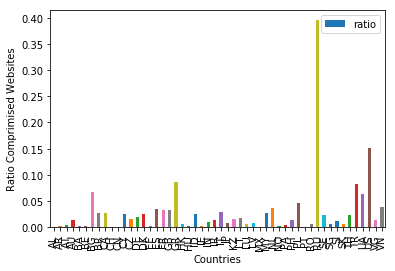

In [76]:
small_hp_countries.plot.bar(x='country',y='ratio')
plt.xlabel("Countries")
plt.ylabel("Ratio Comprimised Websites")

Text(0,0.5,'Total Websites Registered')

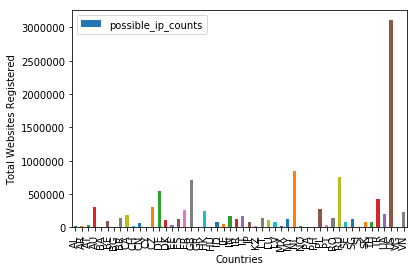

In [77]:
small_hp_countries.plot.bar(x='country',y='possible_ip_counts')
plt.xlabel("Countries")
plt.ylabel("Total Websites Registered")

# # Analyses on Medium Hosting Providers (100.000 to 10.000.000 websites hosted)

In [87]:
medium_hp_countries = ddata_medium_hp.groupby(['country']).sum()
medium_hp_countries = medium_hp_countries.reset_index()
#medium_hp_countries

Text(0,0.5,'Ratio Comprimised Websites')

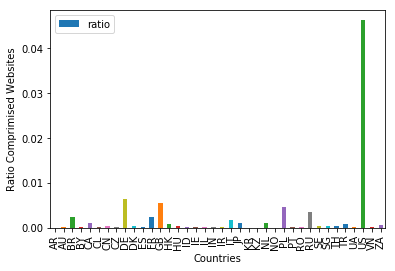

In [80]:
medium_hp_countries.plot.bar(x='country',y='ratio')
plt.xlabel("Countries")
plt.ylabel("Ratio Comprimised Websites")

Text(0,0.5,'Total Websites Registered')

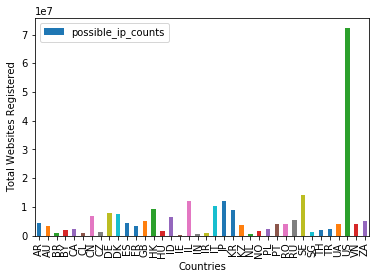

In [81]:
medium_hp_countries.plot.bar(x='country',y='possible_ip_counts')
plt.xlabel("Countries")
plt.ylabel("Total Websites Registered")

## Analyses on Large Hosting Providers (more than to 10.000.000 websites hosted)

In [88]:
large_hp_countries = ddata_large_hp.groupby(['country']).sum()
large_hp_countries = large_hp_countries.reset_index()
#large_hp_countries

Text(0,0.5,'Ratio Comprimised Websites')

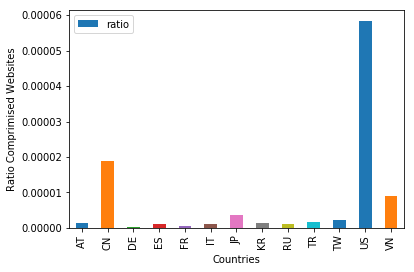

In [84]:
large_hp_countries.plot.bar(x='country',y='ratio')
plt.xlabel("Countries")
plt.ylabel("Ratio Comprimised Websites")

Text(0,0.5,'Total Websites Registered')

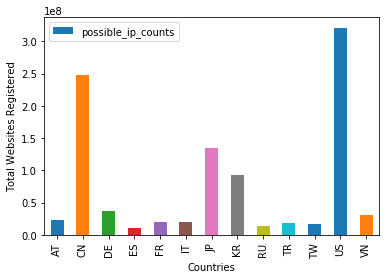

In [85]:
large_hp_countries.plot.bar(x='country',y='possible_ip_counts')
plt.xlabel("Countries")
plt.ylabel("Total Websites Registered")

In [25]:
hosting_facts = pd.read_csv('HostingFacts.csv', delimiter=',', skipinitialspace=True)
hosting_facts

,#,Host,Cost,Support,Average Uptime,Average Load Time,Our Rating
0,1,BlueHost,$2.75/mo,10/10,99.99%,427ms,5
1,2,HostGator Cloud,$2.99/mo,10/10,99.96%,424ms,5
2,3,SiteGround,$3.95/mo,10/10,99.99%,716ms,4
3,4,A2 Hosting,$3.92/mo,10/10,99.92%,367ms,4
4,5,iPage,$1.99/mo,9/10,99.97%,821ms,4
5,6,GoDaddy,$2.49/mo,9/10,99.95%,448ms,4
6,7,MDDHosting,$5.99/mo,9/10,99.95%,393ms,4
7,8,InMotion Hosting,$3.99/mo,9/10,99.93%,813ms,3
8,9,Hostinger,$0.80/mo,8/10,99.97%,384ms,3
9,10,FastComet,$2.95/mo,8/10,99.98%,905ms,3
